In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Dataset gathering

You can download the abalone data set from below link: https://archive.ics.uci.edu/ml/datasets/abalone

In [ ]:
url="https://archive.ics.uci.edu/ml/datasets/abalone"

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Life Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscop

Visualizing Training data

In [ ]:
X.shape

(4177, 8)

In [ ]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
X.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950


Visualizing Test Data

In [ ]:
y.shape

(4177, 1)

In [ ]:
y.head(10)

,Rings
0,15
1,7
2,9
3,10
4,7
5,8
6,20
7,16
8,9
9,19


In [ ]:
y.tail(10)

,Rings
4167,9
4168,8
4169,10
4170,10
4171,8
4172,11
4173,10
4174,9
4175,10
4176,12


# Step 2 Exploratory data analysis

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>],
       [<Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>, <Axes: >]], dtype=object)

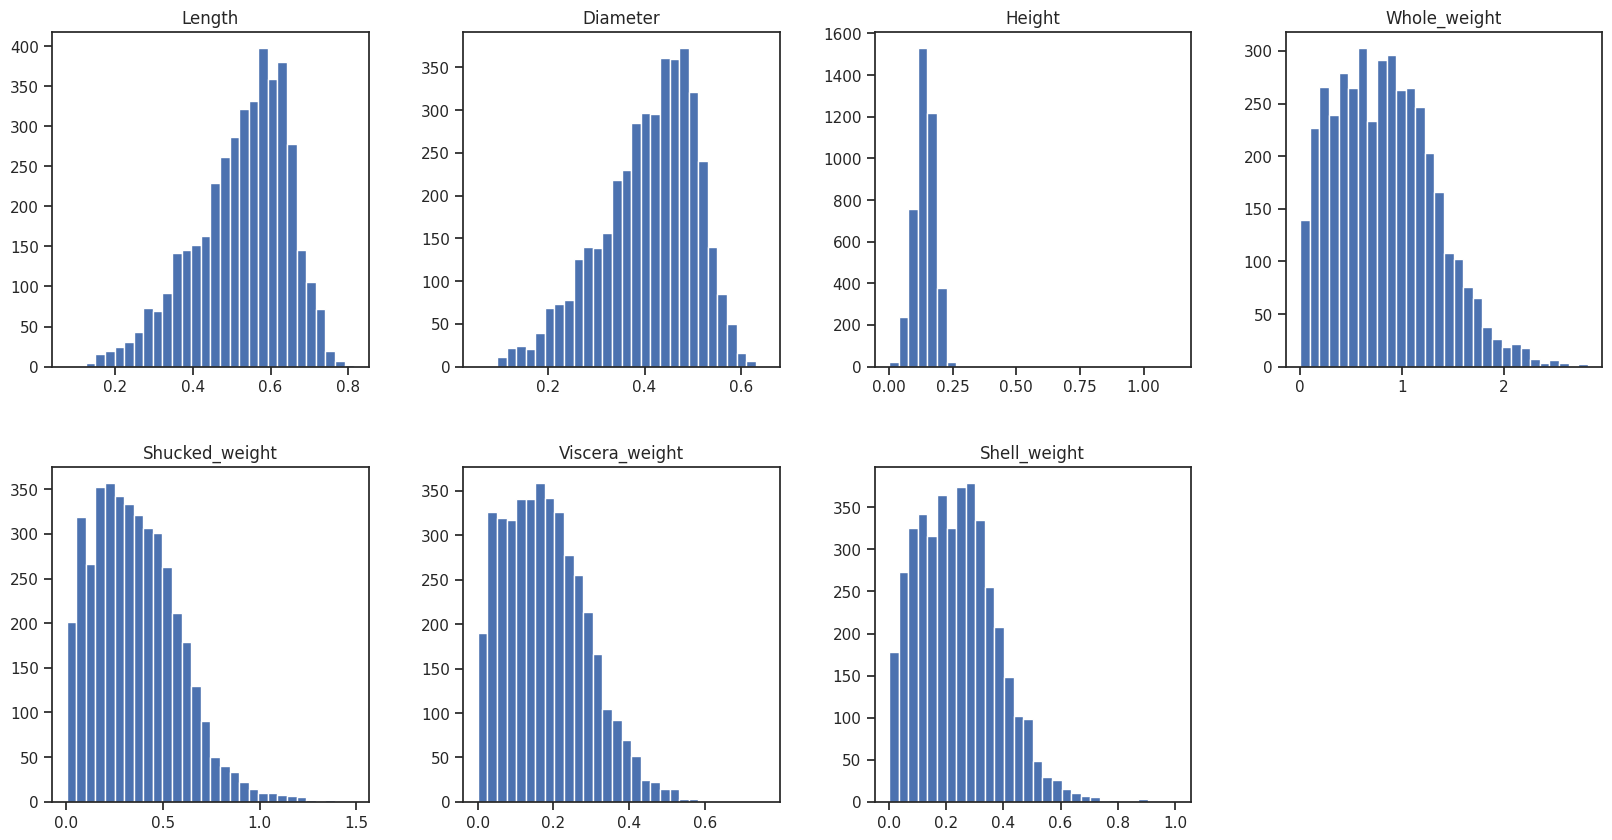

In [ ]:
X.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [ ]:
numerical_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[np.object]).columns

<ipython-input-654-abe81919f96a>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X.select_dtypes(include=[np.object]).columns


Concating X and y in order to visualize it using a heat map

In [ ]:
data = pd.concat([X,y], axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<ipython-input-656-23d7b93ba5c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

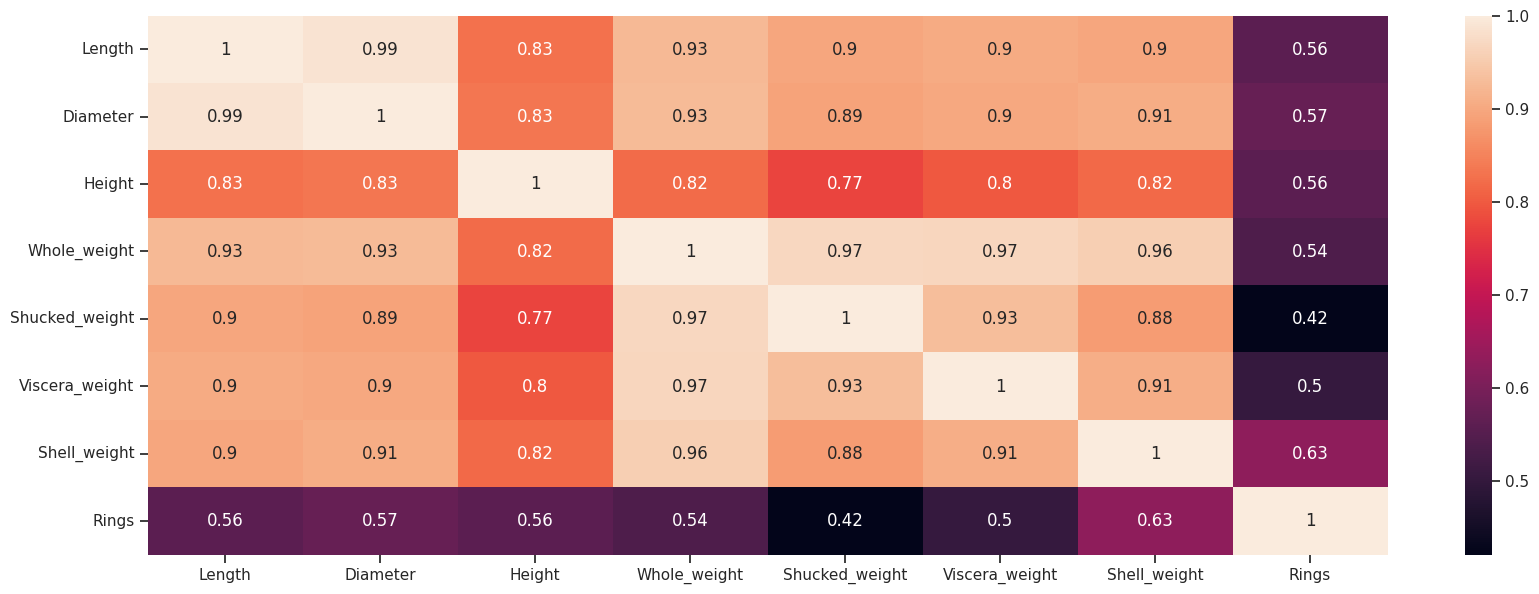

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

    Whole Weight is almost linearly varying with all other features except age
    Heigh has least linearity with remaining features
    Rings is most linearly proprtional with Shell Weight followed by Diameter and length
    Rings is least correlated with Shucked Weight

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data[20:25]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
20,M,0.355,0.280,0.095,0.2455,0.0955,0.062,0.075,11
21,I,0.380,0.275,0.100,0.2255,0.0800,0.049,0.085,10
22,F,0.565,0.440,0.155,0.9395,0.4275,0.214,0.270,12
23,F,0.550,0.415,0.135,0.7635,0.3180,0.210,0.200,9
24,F,0.615,0.480,0.165,1.1615,0.5130,0.301,0.305,10


In [ ]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<Axes: >

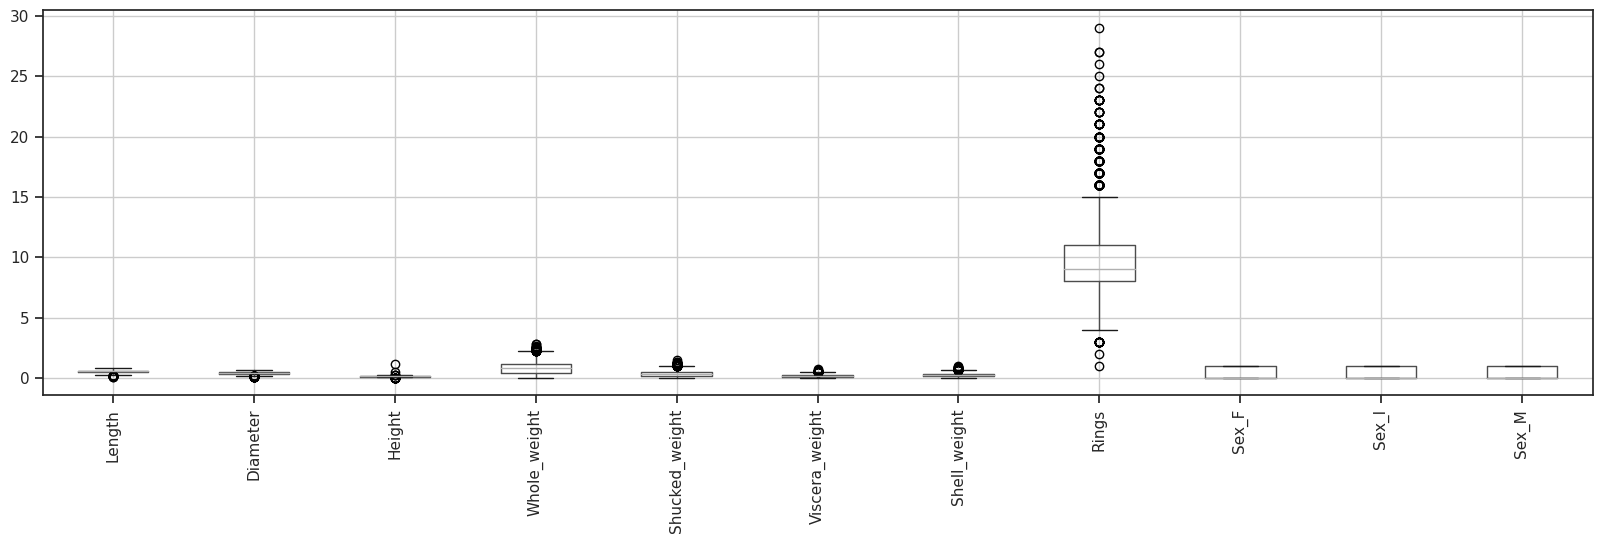

In [ ]:
data.boxplot( rot = 90, figsize=(20,5))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=20)

# Step 3 Data Preprocessing

Since KNN works based on distance between data points, its important that we standardize the data before training the model. Standardization helps in avoiding problems due to scale. We use StandardScaler() function from sklearn for data standardization.

In [ ]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 305.9 KB


In [ ]:
data['Sex_F']=LabelEncoder().fit_transform(data['Sex_F'])
data['Sex_I']=LabelEncoder().fit_transform(data['Sex_I'])
data['Sex_M']=LabelEncoder().fit_transform(data['Sex_M'])

In [ ]:
Xo = data.drop(['Rings'], axis=1)
y = data['Rings']

In [ ]:
Xo.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [ ]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [ ]:
#standardScale = StandardScaler()
#standardScale.fit_transform(Xo)

X_train, X_test, y_train, y_test = train_test_split(Xo, y, test_size = 0.20)

# Step 4 Model Training



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor()
classifier.fit(X_train, y_train)

KNeighborsRegressor()

Lets check how well our trained model perform in predicting the labels of the cross validation data.

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are your true target values and predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # You need to import numpy (import numpy as np) to use np.sqrt
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.5392344497607657
Mean Squared Error: 4.827177033492823
Root Mean Squared Error: 2.197083756594824
R-squared: 0.5246228314414221


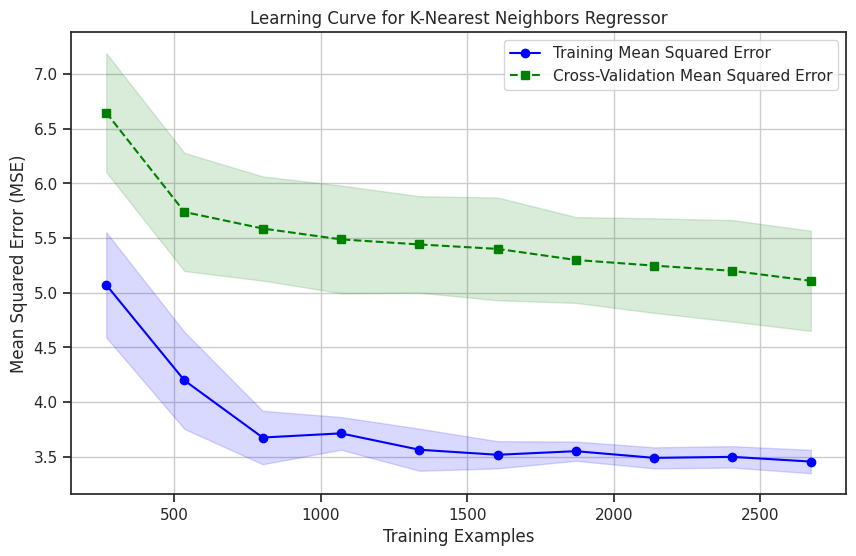

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)  # Since it's regression, we use negative mean squared error
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Mean Squared Error', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Mean Squared Error', color='green', linestyle='--', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for K-Nearest Neighbors Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid()
plt.show()
